In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df=pd.read_csv('E:\\spams.csv',encoding='latin')

In [176]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [177]:
df.shape

(5572, 5)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [179]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [180]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [181]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [182]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [183]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [184]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
encod=LabelEncoder()

In [187]:
df['Target']=encod.fit_transform(df['Target'])

In [188]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [189]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [190]:
df.duplicated().sum()


403

In [191]:
df=df.drop_duplicates(keep='first')

In [192]:
df.shape

(5169, 2)

In [193]:
size=df['Target'].value_counts()
size

Target
0    4516
1     653
Name: count, dtype: int64

In [194]:
label=['ham','spam']
color=['yellow', 'red']


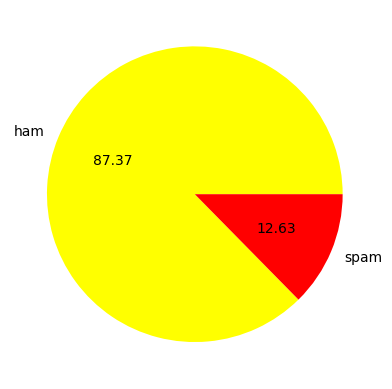

In [195]:
plt.pie(size, labels=label, colors=color, autopct='%0.2f')
plt.show()

In [196]:
import nltk
from nltk import word_tokenize

In [197]:
try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer is available.")
except LookupError:
    print("Punkt tokenizer not found.")

Punkt tokenizer is available.


In [198]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [199]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
df['Num_character']=df['Text'].apply(len)

In [201]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [202]:
df.head()

,Target,Text,Num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [203]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [204]:
df.head()

,Target,Text,Num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [205]:
df[['Num_character', 'num_words', 'num_sentence']].describe()

,Num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [206]:
df[df['Target']==0]

,Target,Text,Num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [207]:
df[df['Target']==1]

,Target,Text,Num_character,num_words,num_sentence
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


<Axes: xlabel='Num_character', ylabel='Count'>

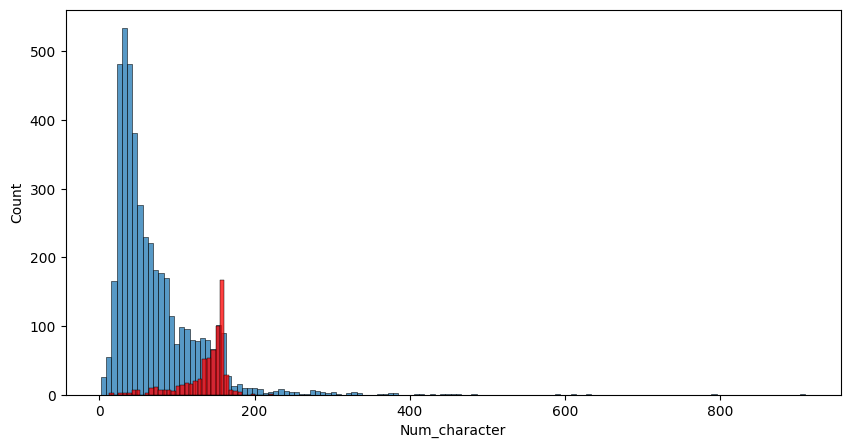

In [208]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target']==0]['Num_character'])
sns.histplot(df[df['Target']==1]['Num_character'], color='red')

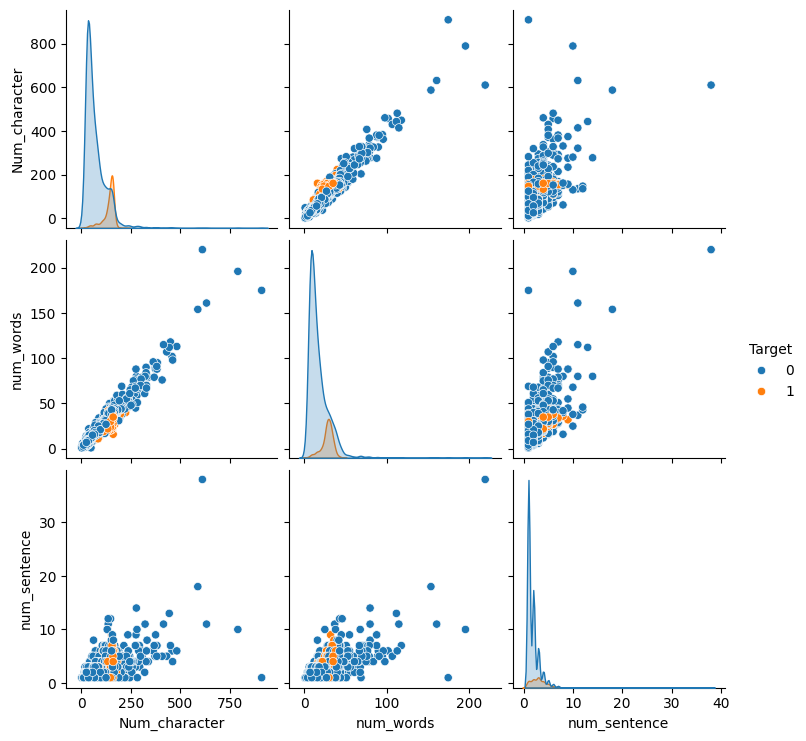

In [209]:
sns.pairplot(df,hue='Target')
plt.show()

In [210]:
df.head()

,Target,Text,Num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [211]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [212]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [213]:
def Transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [214]:
Transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [215]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [216]:
df['Transformed_text']=df['Text'].apply(Transform_text)

In [217]:
df.head()

,Target,Text,Num_character,num_words,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [218]:
from wordcloud import WordCloud

In [219]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [220]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))

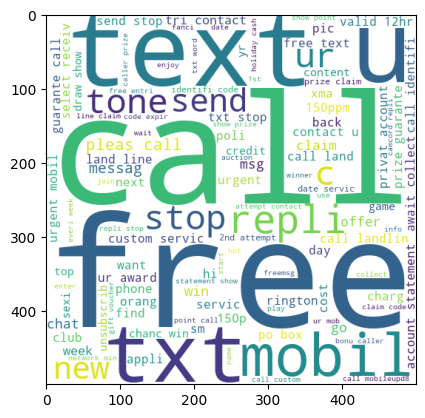

In [221]:
plt.imshow(spam_wc)

In [222]:
ham_wc=wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

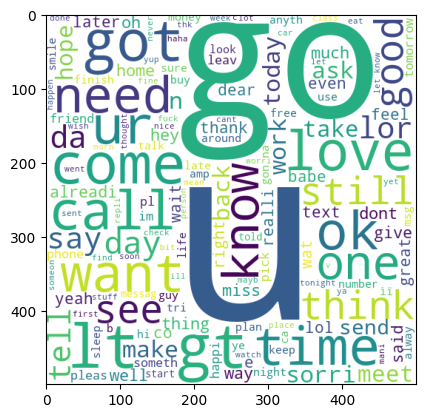

In [223]:
plt.imshow(ham_wc)

In [224]:
spam_word=[]
for msg in df[df['Target']==1]['Transformed_text'].to_list():
    for word in msg.split():
        spam_word.append(word)

In [225]:

len(spam_word)

9939

In [226]:
from collections import Counter
Counter(spam_word).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [227]:
ham_word=[]
for msg in df[df['Target']==0]['Transformed_text'].to_list():
    for word in msg.split():
        ham_word.append(word)

In [228]:
len(ham_word)

35404

In [229]:
df.head(3)

,Target,Text,Num_character,num_words,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [230]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [231]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()


In [232]:
X.shape


(5169, 3000)

In [233]:
y = df['Target']


In [234]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [235]:
y.shape

(5169,)

In [236]:
from sklearn.model_selection import train_test_split


In [237]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [238]:
X_train.shape

(4135, 3000)

In [239]:
y_train.shape

(1034, 3000)

In [240]:
X_test.shape

(4135,)

In [241]:
y_test.shape

(1034,)

In [242]:
# Assuming you need only one column from y_train, you can use this:
y_train = y_train[:, 0]  # Select the first column if it's the correct label

# Ensure that y_train is a 1D array
y_train = y_train.ravel()  # Flatten the array to make it 1D


In [243]:
print(X.shape)  # Check shape of X before split
print(y.shape)  # Check shape of y before split


(5169, 3000)
(5169,)


In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm they match
print(X_train.shape)  # Should be (4135, 3000)
print(y_train.shape)  # Should be (4135,)
print(X_test.shape)   # Should be (1034, 3000)
print(y_test.shape)   # Should be (1034,)

(4135, 3000)
(4135,)
(1034, 3000)
(1034,)


In [255]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [256]:
bn=BernoulliNB()
mb=MultinomialNB()

In [257]:
mb.fit(X_train,y_train)

MultinomialNB()

In [258]:
y_pred2=mb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

0.9729206963249516
[[888   1]
 [ 27 118]]
99.15966386554622


In [259]:
bn.fit(X_train,y_train)

BernoulliNB()

In [260]:
y_pred=bn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [268]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))